In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [163]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/EICHERMOT.csv")

In [164]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,EICHERMOT,EQ,45.20,48.00,48.85,48.00,48.85,48.85,48.75,4100,1.998700e+10,NaN,NaN,NaN
1,2000-01-04,EICHERMOT,EQ,48.85,52.00,52.75,50.15,51.80,51.40,51.44,49100,2.525880e+11,NaN,NaN,NaN
2,2000-01-05,EICHERMOT,EQ,51.40,55.00,55.55,51.05,55.55,55.55,53.99,47800,2.580730e+11,NaN,NaN,NaN
3,2000-01-06,EICHERMOT,EQ,55.55,59.75,60.00,57.30,60.00,60.00,59.75,106200,6.345465e+11,NaN,NaN,NaN
4,2000-01-07,EICHERMOT,EQ,60.00,64.00,64.80,60.10,64.80,64.65,64.08,115500,7.401300e+11,NaN,NaN,NaN


In [165]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5301 entries, 0 to 5300
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5301 non-null   object 
 1   Symbol              5301 non-null   object 
 2   Series              5301 non-null   object 
 3   Prev Close          5301 non-null   float64
 4   Open                5301 non-null   float64
 5   High                5301 non-null   float64
 6   Low                 5301 non-null   float64
 7   Last                5301 non-null   float64
 8   Close               5301 non-null   float64
 9   VWAP                5301 non-null   float64
 10  Volume              5301 non-null   int64  
 11  Turnover            5301 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.3

In [166]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5301.000000,5301.000000,5301.000000,5301.000000,5301.000000,5301.000000,5301.000000,5.301000e+03,5.301000e+03,2456.000000,4.797000e+03,4797.000000
mean,6750.617101,6761.015705,6854.390323,6655.626608,6748.902217,6751.063167,6754.185869,9.628430e+04,6.585217e+13,20394.132329,3.559143e+04,0.574677
std,9702.905045,9720.554306,9837.340546,9578.945003,9699.746985,9702.651623,9705.534096,3.543847e+05,1.483869e+14,27550.083825,8.999170e+04,0.215865
min,17.700000,17.050000,17.750000,15.000000,17.700000,17.700000,17.220000,2.500000e+01,6.300000e+07,20.000000,2.500000e+01,0.040200
25%,225.000000,225.000000,230.000000,220.050000,225.000000,225.050000,225.020000,8.050000e+03,2.220701e+11,3160.250000,6.311000e+03,0.422600
50%,1038.300000,1038.500000,1060.000000,1015.100000,1040.000000,1043.450000,1041.230000,2.262100e+04,1.561524e+12,11820.000000,1.445700e+04,0.585800
75%,15334.600000,15350.000000,15580.000000,15094.200000,15335.000000,15334.600000,15335.020000,5.583800e+04,7.388372e+13,25675.250000,3.050800e+04,0.740300
max,32861.950000,33399.950000,33480.000000,32468.100000,32849.000000,32861.950000,32975.240000,1.149173e+07,2.654207e+15,528187.000000,1.832367e+06,1.000000


In [167]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [168]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [169]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [170]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [171]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [172]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [173]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
5296,2.002576,1.732131,2369.85,1330072,NaN
5297,1.702793,1.276452,2400.10,523800,NaN
5298,5.387631,3.838550,2521.20,1681975,NaN
5299,3.846467,-2.498021,2462.90,1170842,NaN
5300,2.330157,-0.833333,2421.65,646257,NaN


In [174]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_17924\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [175]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [176]:
#Define the prediction model
model = RandomForestRegressor()

In [177]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [178]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9726440557564551


In [179]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [180]:
predictions = model.predict(X_Check)

In [181]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

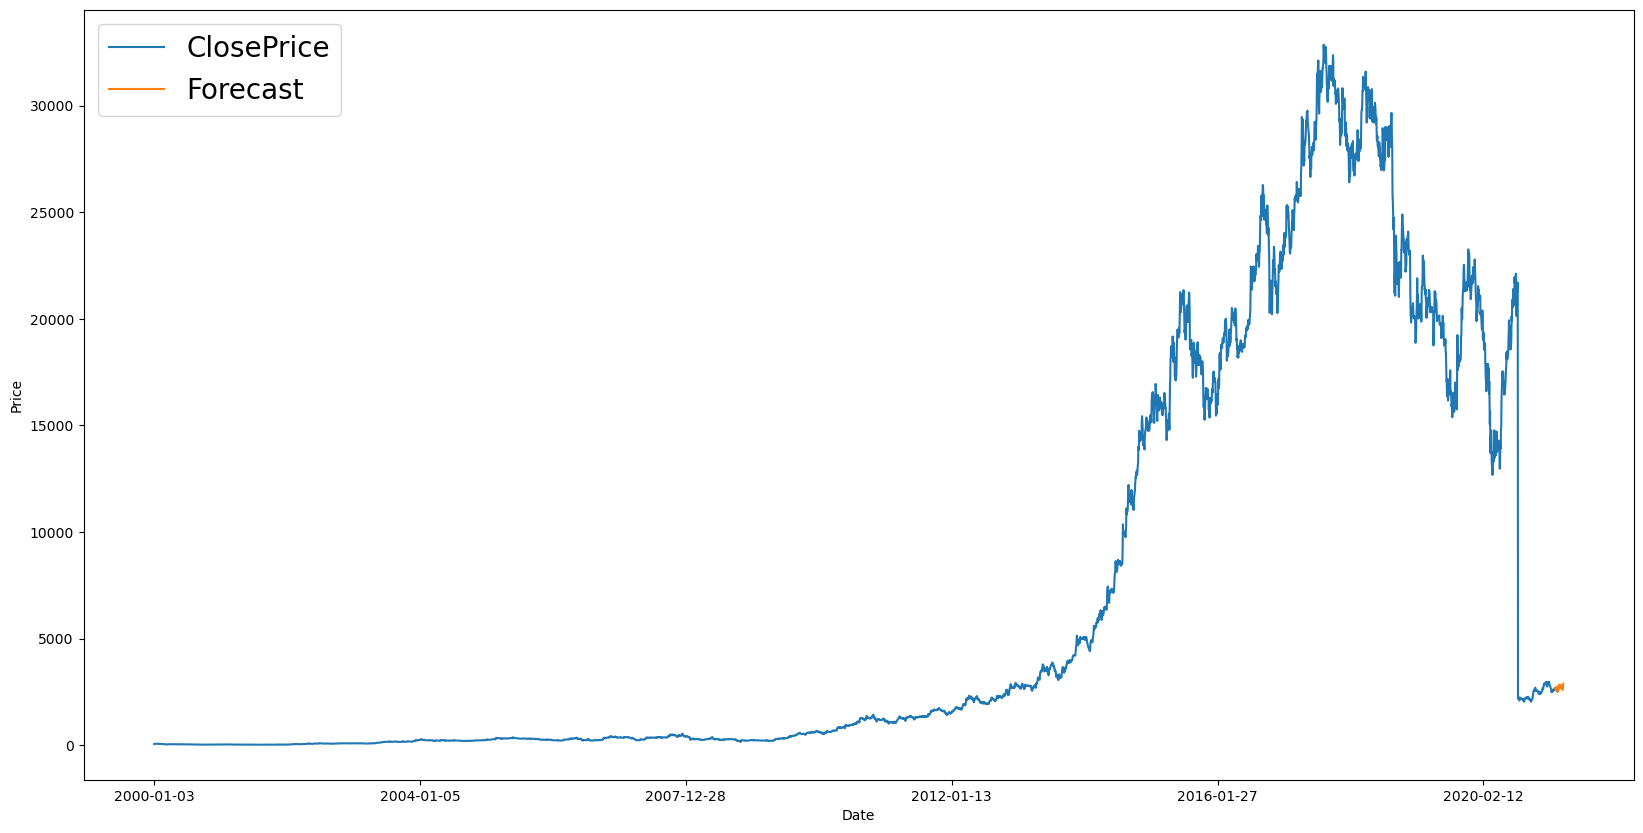

In [182]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')